In [1]:
import numpy as np
import pandas as pd

# Data Processing

## Loading the Data

In [33]:
df = pd.read_csv('bodyfat.csv')

df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [34]:
df.shape

(252, 15)

In [35]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [36]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

## Correlation between the Body Fat Percentage and Other Features

In [37]:
corr = df.corr()

corr['BodyFat']

Density   -0.987782
BodyFat    1.000000
Age        0.291458
Weight     0.612414
Height    -0.089495
Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
Name: BodyFat, dtype: float64

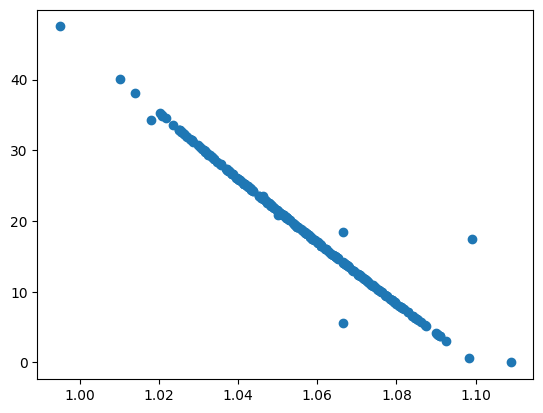

In [38]:
import matplotlib.pyplot as plt

plt.scatter(df['Density'], df['BodyFat'])

Correlation between the body fat percantage and the density of the body is too high. It is so because the body fat calculation formula highly depends on the density of the body.

Since calculation of the body density is too costly and could not be performed at home, lets drop the density feature

In [39]:
df.drop('Density', axis = 1, inplace = True)

df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Additional Features

Lets add some additional features to the dataset. It will help the model work better.

### Body Mass Index (BMI)

Body Mass Index (BMI) is calculated by:
$$\text{BMI} = \frac{\text{Weight} \times 703}{\text{Height}^2}$$

Here, weight is in pounds and height is in inches

In [40]:
df['BMI'] = df['Weight'] * 703.0 / df['Height']**2

df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


### Body Fat Estimated Using BMI

The body fat percentage can be estimated using BMI. The formula is as follows (https://www.livestrong.com/article/173592-how-to-convert-bmi-to-body-fat-percentage/):
$$\text{BF%} = (1.39 \times \text{BMI}) + (0.16 \times \text{Age}) - (10.34 \times \text{Gender}) - 9$$

Gender is specified as 0 for men and 1 for women. In our case, we can put 1 anywhere and obtain:
$$\text{BF%} = (1.39 \times \text{BMI}) + (0.16 \times \text{Age}) - 19.34$$

In [41]:
df['BF_BMI'] = df['BMI'] * 1.39 + df['Age'] * 0.16 - 19.34

df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BF_BMI
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460,17.178000
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048,16.611547
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315,18.466178
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784,19.404290
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854,19.965647


### Body Adiposity Index (BAI)

Body Adiposity Index can be calculated as follows:
$$\text{BAI} = \frac{\text{Hip Circumference}}{\text{Height} \times \sqrt{\text{Height}}} - 18$$

Here height is measured in meters, so to convert from inches to meters we multiply the number by 0.0254.

In [42]:
df['BAI'] = df['Hip'] / (df['Height'] * 0.0254 * np.sqrt(df['Height'] * 0.0254)) - 18

df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BF_BMI,BAI
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460,17.178000,23.861741
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048,16.611547,21.701764
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315,18.466178,27.444599
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784,19.404290,22.707381
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854,19.965647,23.854900


### US Navy Body Fat Formula

US Navy calculates men's body fat using the following formula:
$$\text{BF%} = 86.01 \times \log_{10}(\text{Abdomen} - \text{Neck}) - 70.041 \times \log_{10}(\text{Height}) + 36.76$$

In [43]:
df['Navy'] = 86.010 * np.log10(df['Abdomen'] - df['Neck']) - 70.041 * np.log10(df['Height']) + 36.76

df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BF_BMI,BAI,Navy
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460,17.178000,23.861741,53.895047
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048,16.611547,21.701764,48.340583
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315,18.466178,27.444599,58.136269
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784,19.404290,22.707381,51.938903
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854,19.965647,23.854900,63.260994


## Outlier Removal

Lets remove some BMI and BF outliers. Data points below or above two standard deviations from the mean will be removed.

In [44]:
df['BMI'].describe()

count    252.000000
mean      25.939653
std        9.557513
min       18.015895
25%       23.033400
50%       25.091825
75%       27.331864
max      165.601839
Name: BMI, dtype: float64

In [45]:
mean = df['BMI'].mean()
std = df['BMI'].std()

df = df[(mean - 2 * std < df['BMI']) & (df['BMI'] < mean + 2 * std)]

In [46]:
df['BodyFat'].describe()

count    250.0000
mean      19.0316
std        8.2940
min        0.0000
25%       12.4250
50%       19.2000
75%       25.2000
max       47.5000
Name: BodyFat, dtype: float64

In [47]:
mean = df['BodyFat'].mean()
std = df['BodyFat'].std()

df = df[(mean - 2 * std < df['BodyFat']) & (df['BodyFat'] < mean + 2 * std)]

In [48]:
df.shape

(245, 18)

In total, 7 data points were classified as outliers.

Lets look how body fat percentage is correlated with other features

In [49]:
corr = df.corr()

corr['BodyFat']

BodyFat    1.000000
Age        0.298298
Weight     0.592007
Height    -0.022050
Neck       0.461512
Chest      0.669390
Abdomen    0.802137
Hip        0.593504
Thigh      0.528220
Knee       0.492182
Ankle      0.231025
Biceps     0.461683
Forearm    0.343126
Wrist      0.333159
BMI        0.714751
BF_BMI     0.742675
BAI        0.615304
Navy       0.840249
Name: BodyFat, dtype: float64

## Splitting and Scaling the Data

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Lets use 20% of the dataset as a holdout set

In [51]:
X = df.drop('BodyFat', axis = 1).values
y = df['BodyFat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196, 17), (49, 17), (196,), (49,))

To scale the data the standard scaler will be used:
$$\bar{x} = \frac{x - \mu}{\sigma^2}$$

Where $\mu$ is the mean and $\sigma^2$ is the variance of the training set.

In [52]:
import pickle

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pickle.dump(scaler, open('scaler.sav', 'wb'))

## General Dependence

To check if there is a general correlation between the body fat percentage and the other features, Principal Component Analysis(PCA) and t-Stochastic Neighborhood Embedding(tSNE) will be used.

### PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X_train)

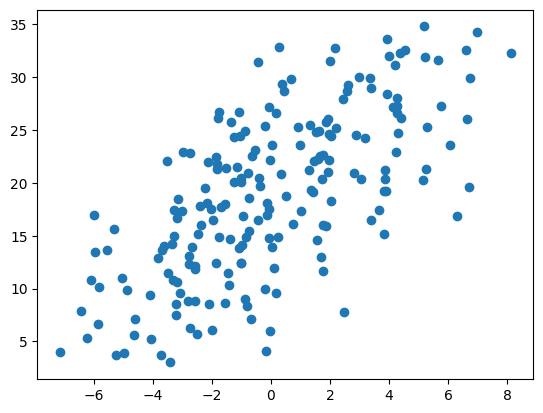

In [24]:
plt.scatter(X_pca, y_train)

### t-SNE

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components = 1)
X_tsne = tsne.fit_transform(X_train)

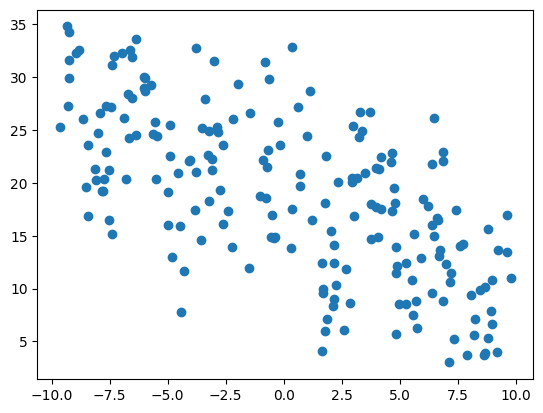

In [27]:
plt.scatter(X_tsne, y_train)

# Model Selection

In [28]:
from sklearn.linear_model import Ridge

In [29]:
model = Ridge(alpha = 10)
model.fit(X_train, y_train)

Ridge(alpha=10)

In [32]:
import pickle

pickle.dump(model, open('model.sav', 'wb'))

In [30]:
y_pred = model.predict(X_test)

Here is the graph of the holdout set testing. Each point is in form $(y_{predicted}, y_{true})$.

Text(0, 0.5, 'True Body Fat')

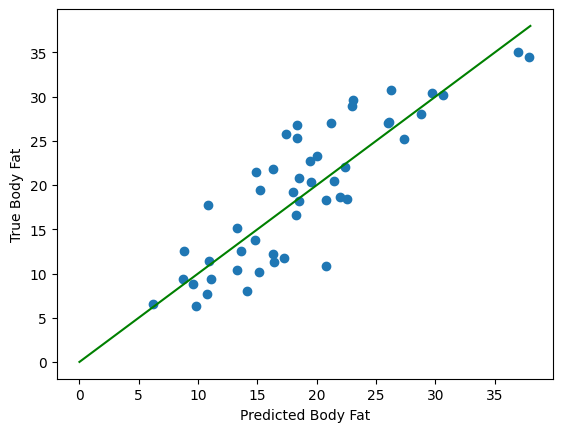

In [31]:
plt.scatter(y_pred, y_test)
plt.plot([0, 38], [0, 38], color = 'green')
plt.xlabel('Predicted Body Fat')
plt.ylabel('True Body Fat')

# Testing the Model

In [34]:
def get_data():
    age = int(input('Age: '))
    weight = float(input('Weight(in lbs): '))
    height = float(input('Height(in in): '))
    neck = float(input('Neck Circumference(in cm): '))
    chest = float(input('Chest Circumference(in cm): '))
    abdomen = float(input('Abdomen Circumference(in cm): '))
    hip = float(input('Hip Circumference(in cm): '))
    thigh = float(input('Thigh Circumference(in cm): '))
    knee = float(input('Knee Circumference(in cm): '))
    ankle = float(input('Ankle Circumference(in cm): '))
    biceps = float(input('Biceps Circumference(in cm): '))
    forearm = float(input('Forearm Circumference(in cm): '))
    wrist = float(input('Wrist Circumference(in cm): '))
    
    bmi = weight * 703.0 / height**2
    bf_bmi = bmi * 1.39 + age * 0.16 - 19.34
    bai = hip / (height * 0.0254 * np.sqrt(height * 0.0254)) - 18
    navy = 86.010 * np.log10(abdomen - neck) - 70.041 * np.log10(height) + 36.76
    
    x = [[age, weight, height, neck, chest, abdomen, hip, thigh, knee, ankle, biceps, forearm, wrist, bmi, bf_bmi, bai, navy]]
    x = scaler.transform(x)
    
    return x

My measures

In [35]:
age = 21
weight = 185
height = 70
neck = 38
chest = 99
abdomen = 91
hip = 101
thigh = 58
knee = 38
ankle = 21
biceps = 31
forearm = 28
wrist = 16
    
bmi = weight * 703.0 / height**2
bf_bmi = bmi * 1.39 + age * 0.16 - 19.34
bai = hip / (height * 0.0254 * np.sqrt(height * 0.0254)) - 18
navy = 86.010 * np.log10(abdomen - neck) - 70.041 * np.log10(height) + 36.76
    
x = [[age, weight, height, neck, chest, abdomen, hip, thigh, knee, ankle, biceps, forearm, wrist, bmi, bf_bmi, bai, navy]]
x = scaler.transform(x)

model.predict(x)[0]

19.951953684467618

Maybe I need to do some cardio after the workout...